# DA Products and Orders

## 01 Setup

In [1]:
#Import libriaries
import numpy as np
import pandas as pd 
import os
import seaborn as sb

In [2]:
# Path
path = r'/Users/peanutcookie/instacart-book/'

In [3]:
# Import pkl file
df = pd.read_pickle(os.path.join(path, '_database', 'orders_products_merged.pkl'))

In [4]:
# Create a subset
# df = df[:1000000]
# NOTE: Creating a subset will change the descriptive statistics values

In [5]:
df.shape

(32404859, 15)

In [6]:
df.head(5)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,_merge,product_name,department_id,prices,exists
0,2539329,1,1,2,8,NaN,True,196,1,0,both,Soda,7,9.0,both
1,2398795,1,2,3,7,15.0,False,196,1,1,both,Soda,7,9.0,both
2,473747,1,3,3,12,21.0,False,196,1,1,both,Soda,7,9.0,both
3,2254736,1,4,4,7,29.0,False,196,1,1,both,Soda,7,9.0,both
4,431534,1,5,4,15,28.0,False,196,1,1,both,Soda,7,9.0,both


In [7]:
df.dtypes

order_id                    object
user_id                     object
order_number                 int64
order_day_of_week            int64
order_hour_of_day            int64
days_since_prior_order     float64
new_customer                  bool
product_id                  object
add_to_cart_order            int64
reordered                    int64
_merge                    category
product_name                object
department_id               object
prices                     float64
exists                    category
dtype: object

## 02 Data grouping and aggregation

Calculate the mean of the “order_number” column grouped by the “department_id” column

### Aggregation

In [8]:
# Solution 1
df.groupby('department_id').agg({'order_number': ['mean']})

,order_number
,mean
department_id,
1,15.457838
10,20.197148
11,16.170638
12,15.887671
13,16.583536
14,16.773669
15,16.165037
16,17.665606


In [9]:
# Solution 2
df.groupby('department_id')['order_number'].mean()

department_id
1     15.457838
10    20.197148
11    16.170638
12    15.887671
13    16.583536
14    16.773669
15    16.165037
16    17.665606
17    15.694469
18    19.310397
19    17.177343
2     17.277920
20    16.473447
21    22.902379
3     17.170395
4     17.811403
5     15.215751
6     16.439806
7     17.225802
8     15.340650
9     15.895474
Name: order_number, dtype: float64

### Multiply aggregations

In [10]:
df.groupby('department_id').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                      mean min max
department_id                     
1                15.457838   1  99
10               20.197148   1  99
11               16.170638   1  99
12               15.887671   1  99
13               16.583536   1  99
14               16.773669   1  99
15               16.165037   1  99
16               17.665606   1  99
17               15.694469   1  99
18               19.310397   1  99
19               17.177343   1  99
2                17.277920   1  99
20               16.473447   1  99
21               22.902379   1  99
3                17.170395   1  99
4                17.811403   1  99
5                15.215751   1  99
6                16.439806   1  99
7                17.225802   1  99
8                15.340650   1  99
9                15.895474   1  99

### Aggregating with transform

In [11]:
df['max_order'] = df.groupby(['user_id'])['order_number'].transform(np.max)

In [12]:
df.head(15)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,_merge,product_name,department_id,prices,exists,max_order
0,2539329,1,1,2,8,NaN,True,196,1,0,both,Soda,7,9.0,both,10
1,2398795,1,2,3,7,15.0,False,196,1,1,both,Soda,7,9.0,both,10
2,473747,1,3,3,12,21.0,False,196,1,1,both,Soda,7,9.0,both,10
3,2254736,1,4,4,7,29.0,False,196,1,1,both,Soda,7,9.0,both,10
4,431534,1,5,4,15,28.0,False,196,1,1,both,Soda,7,9.0,both,10
5,3367565,1,6,2,7,19.0,False,196,1,1,both,Soda,7,9.0,both,10
6,550135,1,7,1,9,20.0,False,196,1,1,both,Soda,7,9.0,both,10
7,3108588,1,8,1,14,14.0,False,196,2,1,both,Soda,7,9.0,both,10
8,2295261,1,9,1,16,0.0,False,196,4,1,both,Soda,7,9.0,both,10
9,2550362,1,10,4,8,30.0,False,196,1,1,both,Soda,7,9.0,both,10


## 03 Setting loyalty flag

In [13]:
df.loc[df['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'
df.loc[(df['max_order'] <= 40) & (df['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'
df.loc[df['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

In [14]:
df['loyalty_flag'].value_counts(dropna=False)

Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: loyalty_flag, dtype: int64

In [15]:
df[['user_id', 'loyalty_flag', 'order_number']].sample(10)

,user_id,loyalty_flag,order_number
1168562,44674,Regular customer,15
28105712,44396,New customer,2
19568663,177925,Regular customer,21
19673057,7620,New customer,5
16301393,91139,Regular customer,3
17049734,7136,Loyal customer,32
29958494,123098,Regular customer,8
5853401,136222,Loyal customer,2
1949628,183785,Loyal customer,39
10263812,14671,Regular customer,38


## 04 Spending habits of the three types of customers

In [16]:
df.groupby('loyalty_flag').agg({'prices': ['mean', 'min', 'max']})

prices              
                       mean  min      max
loyalty_flag                             
Loyal customer    10.386336  1.0  99999.0
New customer      13.294670  1.0  99999.0
Regular customer  12.495717  1.0  99999.0

<Axes: xlabel='prices'>

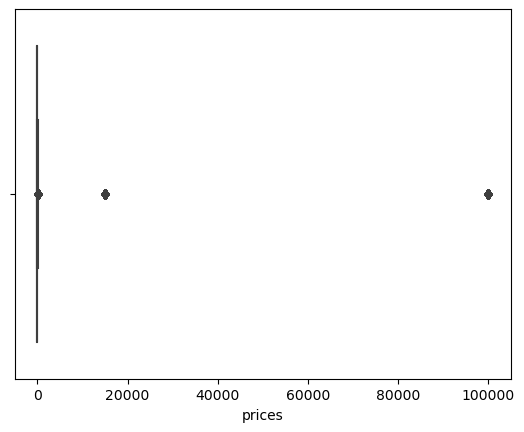

In [17]:
# Visualise the column to get a picture of the 99999.0 value meaning.
sb.boxplot (x= df['prices'])

In average the first order has the highest amount in spending. The more orders the user makes, the less spendings is observed.

## 'prices' column investigation

In [18]:
# Search for the outliers
df['prices'].drop_duplicates().sort_values(ascending=False)

29165516    99999.0
10030345    14900.0
18504754       25.0
25758883       24.9
28425432       24.8
             ...   
3384024         1.4
632766          1.3
5488887         1.2
5147325         1.1
60725           1.0
Name: prices, Length: 242, dtype: float64

In [19]:
# Retrive infomration on the products with outliers prices
outlier_products = df.loc[(df['prices'] == 99999.0) | (df['prices'] == 14900.0), 'product_id':'prices'].drop_duplicates()
outlier_products

,product_id,add_to_cart_order,reordered,_merge,product_name,department_id,prices
10030345,21553,5,0,both,Lowfat 2% Milkfat Cottage Cheese,16,14900.0
10030346,21553,3,1,both,Lowfat 2% Milkfat Cottage Cheese,16,14900.0
10030347,21553,6,0,both,Lowfat 2% Milkfat Cottage Cheese,16,14900.0
10030349,21553,9,0,both,Lowfat 2% Milkfat Cottage Cheese,16,14900.0
10030351,21553,9,1,both,Lowfat 2% Milkfat Cottage Cheese,16,14900.0
...,...,...,...,...,...,...,...
29166003,33664,37,0,both,2 % Reduced Fat Milk,16,99999.0
29166023,33664,23,1,both,2 % Reduced Fat Milk,16,99999.0
29166052,33664,32,0,both,2 % Reduced Fat Milk,16,99999.0
29166173,33664,28,0,both,2 % Reduced Fat Milk,16,99999.0


In [20]:
# Filter out the department number to clean the dataframe
df.loc[(df['product_name'] == "Lowfat 2% Milkfat Cottage Cheese") | (df['product_name'] == "2 % Reduced Fat  Milk"), 'department_id'].unique()

array(['16'], dtype=object)

In [21]:
# Isolate department 16
dep_16 = df.loc[(df['department_id']=="16")]

In [22]:
# Rreturn Q1
dep_16['prices'].quantile(0.25)

4.8

In [23]:
# Return Q2
dep_16['prices'].quantile(0.75)

11.9

In [24]:
# Set variable holding average price in the set without outliers
dep_16_ave_price = df[(df['department_id'] == "16") & (df['prices'] != 99999) | (df['prices'] != 14900)]

In [25]:
# Return mean value of the set without outliers
dep_16_ave_price['prices'].mean()

11.980225638383454

In [26]:
# Replace values
# NOTE: Better approach would be contacting sales to get the correct price instead of calculating mean. 
df['prices'] = df['prices'].replace({99999: 9.99, 14900: dep_16_ave_price['prices'].mean()})

In [27]:
# Check the fix results
df['prices'].describe()

count    3.240486e+07
mean     7.791614e+00
std      4.241769e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [28]:
# Recalculate the loyalty_flag statistics
df.groupby('loyalty_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                      mean  min   max
loyalty_flag                         
Loyal customer    7.774103  1.0  25.0
New customer      7.801911  1.0  25.0
Regular customer  7.798908  1.0  25.0

<Axes: xlabel='prices'>

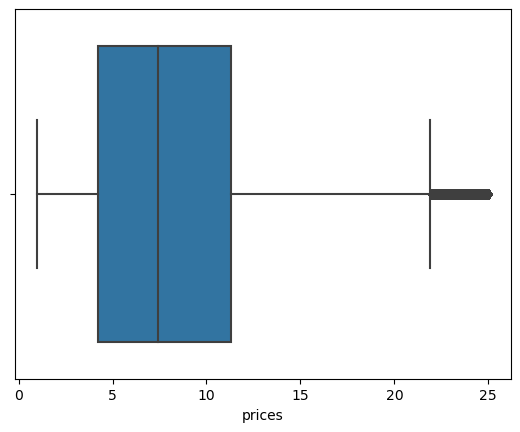

In [29]:
# Visualise statistics
sb.boxplot (x= df['prices'])

## 05 Types of spending (high - low)

In [30]:
# Calculate average of the prices / customer
df['average_price'] = df.groupby(['user_id'])['prices'].transform(np.mean)

In [31]:
df['average_price'].head(5)

0    6.367797
1    6.367797
2    6.367797
3    6.367797
4    6.367797
Name: average_price, dtype: float64

In [32]:
# Round the result to match currency 
df['average_price'].round(2)

0           6.37
1           6.37
2           6.37
3           6.37
4           6.37
            ... 
32404854    6.91
32404855    6.91
32404856    7.63
32404857    7.63
32404858    7.68
Name: average_price, Length: 32404859, dtype: float64

In [33]:
# Create spending_type flag 
df.loc[df['average_price'] < 10, 'spending_type'] = 'Low spender'
df.loc[df['average_price'] >= 10, 'spending_type'] = 'High spender'

In [34]:
df[['average_price', 'spending_type']].head(5)

,average_price,spending_type
0,6.367797,Low spender
1,6.367797,Low spender
2,6.367797,Low spender
3,6.367797,Low spender
4,6.367797,Low spender


In [35]:
# Return spending_type distribution
df['spending_type'].value_counts(dropna=False)

Low spender     32285120
High spender      119739
Name: spending_type, dtype: int64

## 05 Frequent vs non-frequent users

In [36]:
# Calculate median of the prior_orders
df['median_prior_orders'] = df.groupby(['user_id'])['days_since_prior_order'].transform(np.median)

In [37]:
# Create a 'order_frequency_flag' flags
df.loc[df['median_prior_orders'] > 20, 'order_frequency_flag'] = 'Non-frequent'
df.loc[(df['median_prior_orders'] > 10) & (df['median_prior_orders'] <= 20), 'order_frequency_flag'] = 'Regular'
df.loc[df['median_prior_orders'] <= 10, 'order_frequency_flag'] = 'Frequent customer'

In [38]:
df[['median_prior_orders', 'order_frequency_flag']].head(5)

,median_prior_orders,order_frequency_flag
0,20.5,Non-frequent
1,20.5,Non-frequent
2,20.5,Non-frequent
3,20.5,Non-frequent
4,20.5,Non-frequent


In [39]:
df['order_frequency_flag'].value_counts(dropna = False)

Frequent customer    21559853
Regular               7208564
Non-frequent          3636437
NaN                         5
Name: order_frequency_flag, dtype: int64

In [40]:
# Return rows with NaN values
df[df['order_frequency_flag'].isnull()]

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,product_name,department_id,prices,exists,max_order,loyalty_flag,average_price,spending_type,median_prior_orders,order_frequency_flag
13645692,895835,159838,1,0,17,NaN,True,10749,3,0,...,Organic Red Bell Pepper,4,5.7,both,1,New customer,7.42,Low spender,NaN,NaN
17251990,895835,159838,1,0,17,NaN,True,33401,6,0,...,Goat Cheese Crumbles,16,14.8,both,1,New customer,7.42,Low spender,NaN,NaN
17622767,895835,159838,1,0,17,NaN,True,23695,2,0,...,California Veggie Burger,1,4.7,both,1,New customer,7.42,Low spender,NaN,NaN
24138593,895835,159838,1,0,17,NaN,True,21334,5,0,...,Organic Peeled Garlic,4,10.2,both,1,New customer,7.42,Low spender,NaN,NaN
25880002,895835,159838,1,0,17,NaN,True,22198,1,0,...,4X Ultra Concentrated Natural Laundry Detergen...,17,1.7,both,1,New customer,7.42,Low spender,NaN,NaN


In [41]:
df.loc[df['user_id'] == 159838] 

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,product_name,department_id,prices,exists,max_order,loyalty_flag,average_price,spending_type,median_prior_orders,order_frequency_flag


In [42]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', '_merge',
       'product_name', 'department_id', 'prices', 'exists', 'max_order',
       'loyalty_flag', 'average_price', 'spending_type', 'median_prior_orders',
       'order_frequency_flag'],
      dtype='object')

In [43]:
df.drop(['_merge', 'exists'], axis=1, inplace=True)

## 07 Export

In [44]:
df.to_pickle(os.path.join(path,'_database', 'orders_products_merged.pkl'))